## Titanic dataset analysis and prepare for model and predict

In [20]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [27]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [28]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [29]:
df['Age'] = df.Age.fillna(df["Age"].mean()).astype(int)

In [30]:
df.Age

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [31]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [32]:
df['Sex'] = df['Sex'].map({
    'male': 1,
    'female': 0
})

df.head()

'''
you can also use ----->           df1 = pd.get_dummies(df.Sex) 
and then ,

df2 = pd.concat([df,df1],axis = 'columns')

'''

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22,7.2500
1,1,1,0,38,71.2833
2,1,3,0,26,7.9250
3,1,1,0,35,53.1000
4,0,3,1,35,8.0500


In [34]:
x = df.drop('Survived',axis='columns')
x.head()

,Pclass,Sex,Age,Fare
0,3,1,22,7.2500
1,1,0,38,71.2833
2,3,0,26,7.9250
3,1,0,35,53.1000
4,3,1,35,8.0500


In [35]:
y = df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Visualize

G:\Himel.conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Survived'>

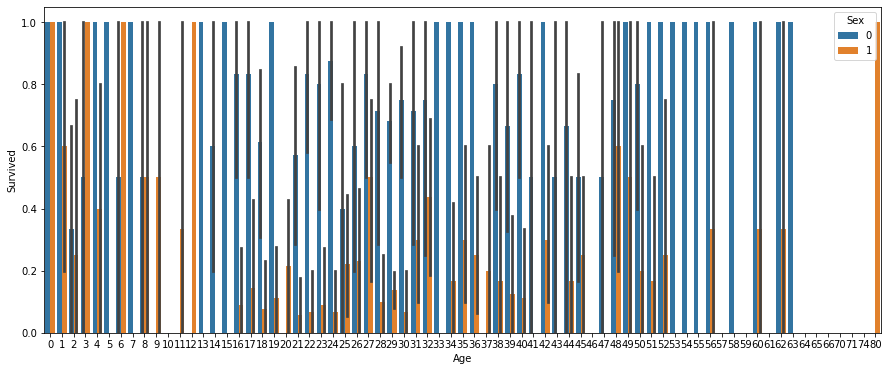

In [60]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,6)
sns.barplot('Age','Survived',hue="Sex",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

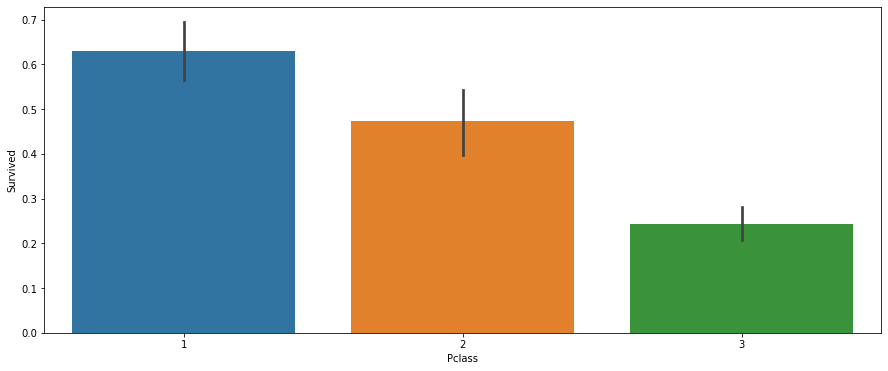

In [61]:
sns.barplot(x="Pclass", y="Survived", data = df)

### Pie Chart

In [73]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22,7.2500
1,1,1,0,38,71.2833
2,1,3,0,26,7.9250
3,1,1,0,35,53.1000
4,0,3,1,35,8.0500


In [75]:
Pclass = df['Pclass'].value_counts()
Survived = df['Survived'].value_counts()

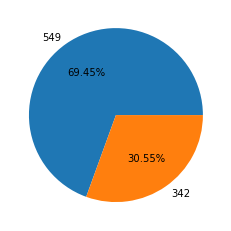

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.pie(Pclass[:2], labels =Survived ,autopct="%1.2f%%")
plt.show()

# Train model and predict and lastly find the score 

In [36]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=36)

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [51]:
x_test

,Pclass,Sex,Age,Fare
212,3,1,22,7.2500
289,3,0,22,7.7500
211,2,0,35,21.0000
309,1,0,30,56.9292
688,3,1,18,7.7958
...,...,...,...,...
443,2,0,28,13.0000
179,3,1,36,0.0000
478,3,1,22,7.5208
139,1,1,24,79.2000


In [52]:
lr.predict(x_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0], dtype=int64)

In [53]:
lr.score(x_test,y_test)

0.7888888888888889

## Support Vector

In [55]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

0.6222222222222222

### Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
nb.score(x_test,y_test)

0.8

In [59]:
nb.predict([[3,2,22,7.5]])

G:\Himel.conda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)